<center>
##   MACHINE LEARNING
###   EM algorithm for normal distribution

###   Evangelia Santorinaiou 3130182

#### Libraries

In [66]:
import numpy as np
from numpy.linalg import inv
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

#### Load data

In [54]:
image = Image.open("im.jpg")
image = np.array(image)
d1 = image.shape[0]
d2 = image.shape[1]
data = image.reshape(image.shape[0]*image.shape[1], 3)

Given a set of training data X with N x D size, we suppose each data is independently produced from a spherical Gaussian mixture: 
$$p(\mathbf{x}) = \sum_{k=1}^K \pi_k \prod_{d=1}^D\frac{1}{\sqrt{2\pi var_k}}\exp \left\{ \frac{-1}{2 var}{(x_d - \mu_d)}^2 \right\} $$
where
- π is the prior probability, the mixing coefficient
- $\prod_{d=1}^D\frac{1}{\sqrt{2\pi var_k}}\exp\left\{\frac{-1}{2 var}{(x_d - mu_d)}^2\right\} $ is the mixture component for each class k

### EM algorithm

We are going to implement EM algorithm in order to maximize the logarithmic likelihood and to get the best parametres for our classification.

The logarithmic likelihood is 
$$\sum_{n=1}^N log \sum_{k=1}^K\pi_k\frac{1}{\sqrt{2\pi var_k}}\exp\left\{\frac{-1}{2 var_k}{(x_d - \mu_{kd})}^2 \right\} $$
and if we compute the derivatives and set them to zero we get

$$\mu_k^{(t+1)} = \frac{\sum_{n=1}^N \gamma(z_{nk}) x_{n}}{\sum_{n=1}^N \gamma(z_{nk})}$$
$$var_k^{(t+1)} = \frac{\sum_{n=1}^N \sum_{d=1}^D \gamma(z_{nk})(x_{nd} - \mu_k^{(t+1)})^2}{\sum_{n=1}^N \gamma(z_{nk})} $$
$$ \pi_k^{(t+1)} = \frac{\sum_{n=1}^N \gamma(z_{nk})}{N}$$

In [55]:
def logarithmic_likelihood(sum_log_gauss):
    return np.sum(sum_log_gauss)

In [56]:
def initialize_parameters(X, K):
    pi = []
    mu = []
    var = []
    N = X.shape[0]
    for k in range(K):
        pi.append(1.0/K)
        ch = np.random.choice(N, size=50)
        mu_ = np.sum(X[ch,:], axis=0) / X.shape[0]
        mu.append(mu_.reshape((1,X.shape[1])))
        var.append(np.var(X[ch,0]))
        
    return mu, var, pi

In [57]:
def expectation(X, mu, var, pi):
    
    gamma = []
    log_gaus = []
    K = len(pi)
    for k in range(K):
        log_gaus_ = np.log(pi[k]) + np.sum(-0.5 * np.square(X - mu[k]) / var[k] - np.log(np.sqrt(2 * np.pi * var[k])), axis=1, keepdims=True)
        log_gaus.append(log_gaus_)
       
    log_gaus = np.array(log_gaus).reshape(K, X.shape[0]).T  
   
    M = np.max(log_gaus, axis=1)
    M = M[:, np.newaxis]
    
    sum_gaus = np.sum(np.exp(log_gaus - M), axis=1, keepdims=True)
    sum_log_gaus = M + np.log(sum_gaus)
    gamma = np.exp(log_gaus - sum_log_gaus)
    return gamma, sum_log_gaus

#     K = len(pi)
#     D = X.shape[1]
#     A = []
#     for k in range(K):
#         a = pi[k] * np.exp(-0.5 * np.sum(np.square(X - mu[k]), axis=1) / var[k]) / np.power(2*np.pi*var[k], D/2.0)
#         A.append(a)
#     A = np.array(A).reshape(K, X.shape[0]).T
#     B = np.sum(A, axis=1, keepdims=True)
#     print(A.shape)
#     print(B.shape)
#     return A/B, B

In [58]:
def maximazation(X, gamma):
    pi = []
    var = []
    mu = []
    N, K = gamma.shape
    D = X.shape[1]
    
    gamma_sum = np.sum(gamma, axis=0, keepdims=True)
    mu_  = np.dot(gamma.T, X) / gamma_sum.T        
    pi_  = gamma_sum / X.shape[0]
        
    for k in range(K):
        mu.append(mu_[k].reshape(1,D))
        pi.append(pi_[:,k])
    
    for k in range(K):
        gk = gamma[:,k].reshape(1,N)
        var_ = np.sum(np.dot(gk, np.square(X - mu[k])))
        var.append(var_)
    
    var = np.array(var).reshape(K,1) / (D * gamma_sum.T)
    var = var.reshape(K,).tolist()
     
    return mu, var, pi

In [59]:
def EM(X, K): 

    mu, var, pi = initialize_parameters(X, K)
    tol = 0.1
    L_ = -9999999999999999999
    
    for it in range(1, 20):
        gamma, sum_log_gauss = expectation(X, mu, var, pi)
        L = logarithmic_likelihood(sum_log_gauss)
        mu, var, pi = maximazation(X, gamma)
        if (L - L_) <= -1e-10:
            print "Νew likelihood less than old."
            
        L_ = L
    return mu, gamma

In [75]:
def get_error(X, X_):
    print "Error ", np.linalg.norm(X - X_)/ X.shape[0]

In [61]:
def compress(X, mu, gamma):
    X_ = X.copy()
    for i in range(X.shape[0]):
        X_[i,:] = mu[np.argmax(gamma[i,:])]
    return X_

-6601300.98727 -9999999999999999999
-6131241.73766 -6601300.98727
-5426482.29236 -6131241.73766
-5233206.1669 -5426482.29236
-5228140.43627 -5233206.1669
-5226562.37065 -5228140.43627
-5225984.13711 -5226562.37065
-5225768.37402 -5225984.13711
-5225686.71535 -5225768.37402
-5225655.49295 -5225686.71535
-5225643.47138 -5225655.49295
-5225638.82135 -5225643.47138
-5225637.01733 -5225638.82135
-5225636.31612 -5225637.01733
-5225636.04324 -5225636.31612
-5225635.93696 -5225636.04324
-5225635.89555 -5225635.93696
-5225635.87941 -5225635.89555
-5225635.87312 -5225635.87941
Error  0.488569694761


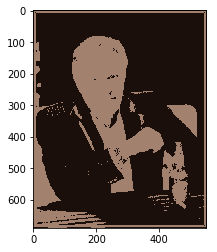

In [77]:
K = 2
mu, gamma = EM(data, K)
X_ = compress(data, mu, gamma)
get_error(data, X_)
X_ = X_.reshape(d1, d2, 3)
plt.imshow(X_)

-6544497.84965 -9999999999999999999
-5494441.87666 -6544497.84965
-5028683.69901 -5494441.87666
-4848960.45247 -5028683.69901
-4751050.99051 -4848960.45247
-4703554.24317 -4751050.99051
-4661470.63498 -4703554.24317
-4620053.29815 -4661470.63498
-4584255.51835 -4620053.29815
-4555926.9212 -4584255.51835
-4535369.17083 -4555926.9212
-4514260.08255 -4535369.17083
-4484910.95031 -4514260.08255
-4450466.73034 -4484910.95031
-4426243.89805 -4450466.73034
-4414936.76469 -4426243.89805
-4408448.23413 -4414936.76469
-4403823.66926 -4408448.23413
-4400291.50475 -4403823.66926
Error  0.458052390715


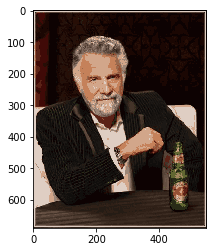

In [81]:
K = 32
mu = []
mu, gamma = EM(data, K)
X_ = compress(data, mu, gamma)
get_error(data, X_)
X_ = X_.reshape(d1, d2, 3)
plt.imshow(X_)


-6636798.96866 -9999999999999999999
-5581620.31126 -6636798.96866
-5154502.43962 -5581620.31126
-4997322.83453 -5154502.43962
-4884388.29122 -4997322.83453
-4853538.30085 -4884388.29122
-4849969.95568 -4853538.30085
-4848049.96611 -4849969.95568
-4846710.60021 -4848049.96611
-4845755.28146 -4846710.60021
-4845063.83886 -4845755.28146
-4844555.98683 -4845063.83886
-4844177.38161 -4844555.98683
-4843890.90099 -4844177.38161
-4843670.9479 -4843890.90099
-4843499.69359 -4843670.9479
-4843364.58398 -4843499.69359
-4843256.67505 -4843364.58398
-4843169.51554 -4843256.67505
Error  0.482269779713


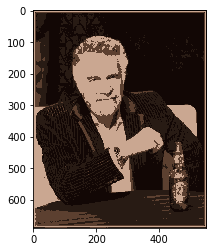

In [76]:
K = 4
mu, gamma = EM(data, K)
X_ = compress(data, mu, gamma)
get_error(data, X_)
X_ = X_.reshape(d1, d2, 3)
plt.imshow(X_)

-6550921.89586 -9999999999999999999
-5495884.22795 -6550921.89586
-5029979.67163 -5495884.22795
-4875455.55084 -5029979.67163
-4817307.93263 -4875455.55084
-4784596.22758 -4817307.93263
-4764000.08605 -4784596.22758
-4752498.46656 -4764000.08605
-4744544.485 -4752498.46656
-4738132.17179 -4744544.485
-4732208.27382 -4738132.17179
-4726534.92175 -4732208.27382
-4721170.34581 -4726534.92175
-4716193.62367 -4721170.34581
-4711650.05944 -4716193.62367
-4707552.98536 -4711650.05944
-4703892.97139 -4707552.98536
-4700649.29699 -4703892.97139
-4697802.83518 -4700649.29699
Error  0.47738370916


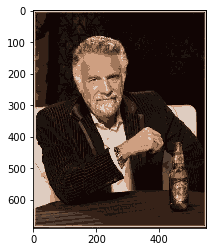

In [78]:
K = 8
mu, gamma = EM(data, K)
X_ = compress(data, mu, gamma)
get_error(data, X_)
X_ = X_.reshape(d1, d2, 3)
plt.imshow(X_)

-6566859.27225 -9999999999999999999
-5509841.57824 -6566859.27225
-5026722.48687 -5509841.57824
-4860787.48106 -5026722.48687
-4770501.00743 -4860787.48106
-4727231.60268 -4770501.00743
-4703674.39898 -4727231.60268
-4681652.38699 -4703674.39898
-4655630.14459 -4681652.38699
-4634396.76254 -4655630.14459
-4618197.16117 -4634396.76254
-4606056.84751 -4618197.16117
-4597474.57896 -4606056.84751
-4588303.02872 -4597474.57896
-4574663.90233 -4588303.02872
-4560015.09801 -4574663.90233
-4546896.61389 -4560015.09801
-4535283.72351 -4546896.61389
-4526325.66616 -4535283.72351
Error  0.471323955728


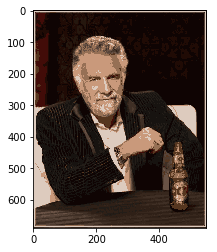

In [79]:
K = 16
mu, gamma = EM(data, K)
X_ = compress(data, mu, gamma)
get_error(data, X_)
X_ = X_.reshape(d1, d2, 3)
plt.imshow(X_)

-6545760.81717 -9999999999999999999
-5474436.32312 -6545760.81717
-5014494.97405 -5474436.32312
-4828034.01457 -5014494.97405
-4729836.79428 -4828034.01457
-4686103.49127 -4729836.79428
-4653990.33154 -4686103.49127
-4617545.39773 -4653990.33154
-4579012.08431 -4617545.39773
-4539999.61324 -4579012.08431
-4496417.96276 -4539999.61324
-4445405.09389 -4496417.96276
-4402300.08072 -4445405.09389
-4371442.31609 -4402300.08072
-4347109.13793 -4371442.31609
-4326929.85313 -4347109.13793
-4311731.86923 -4326929.85313
-4299849.82591 -4311731.86923
-4290069.2615 -4299849.82591
Error  0.434791208906


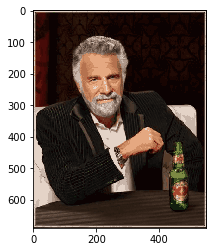

In [82]:
data = image.reshape(image.shape[0]*image.shape[1], 3)
K = 64
mu, gamma = EM(data, K)
X_ = compress(data, mu, gamma)
get_error(data, X_)
X_ = X_.reshape(d1, d2, 3)
plt.imshow(X_)